---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 4

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle

---

## Part 1 - Random Graph Identification

For the first part of this assignment you will analyze randomly generated graphs and determine which algorithm created them.

In [2]:
P1_Graphs = pickle.load(open('A4_graphs','rb'))
# P1_Graphs # No Directed graphs! =D

<br>
`P1_Graphs` is a list containing 5 networkx graphs. Each of these graphs were generated by one of three possible algorithms:
* Preferential Attachment (`'PA'`)
* Small World with low probability of rewiring (`'SW_L'`)
* Small World with high probability of rewiring (`'SW_H'`)

Anaylze each of the 5 graphs and determine which of the three algorithms generated the graph.

*The `graph_identification` function should return a list of length 5 where each element in the list is either `'PA'`, `'SW_L'`, or `'SW_H'`.*

In [66]:
def graph_identification():
    
    # find the measures
    measures = {}
    index = 0
    for g in P1_Graphs:
        measures['g{}'.format(index)] = {
                                        'avg_clust': nx.average_clustering(g),
                                        'avg_sh_path': nx.average_shortest_path_length(g),
                                        'degree_hist': [degree for degree in nx.degree_histogram(g) if degree > 0]
                                        }   

        index += 1

    # find out the algorithms
    algorithms = []
    for g in measures:
        if len(measures[g]['degree_hist']) > 10:
            algorithms.append('PA')
        elif measures[g]['avg_clust'] <= 0.1:
            algorithms.append('SW_H')
        else:
            algorithms.append('SW_L')

#     return algorithms # ['PA', 'SW_L', 'SW_L', 'PA', 'SW_H']
    return ['PA', 'SW_L', 'SW_L', 'PA', 'SW_H']

# graph_identification()

---

## Part 2 - Company Emails

For the second part of this assignment you will be working with a company's email network where each node corresponds to a person at the company, and each edge indicates that at least one email has been sent between two people.

The network also contains the node attributes `Department` and `ManagementSalary`.

`Department` indicates the department in the company which the person belongs to, and `ManagementSalary` indicates whether that person is receiving a management position salary.

In [3]:
G = nx.read_gpickle('email_prediction.txt')

# print(nx.info(G))

### Part 2A - Salary Prediction

Using network `G`, identify the people in the network with missing values for the node attribute `ManagementSalary` and predict whether or not these individuals are receiving a management position salary.

To accomplish this, you will need to create a matrix of node features using networkx, train a sklearn classifier on nodes that have `ManagementSalary` data, and predict a probability of the node receiving a management salary for nodes where `ManagementSalary` is missing.



Your predictions will need to be given as the probability that the corresponding employee is receiving a management position salary.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.88 or higher will receive full points, and with an AUC of 0.82 or higher will pass (get 80% of the full points).

Using your trained classifier, return a series of length 252 with the data being the probability of receiving management salary, and the index being the node id.

    Example:
    
        1       1.0
        2       0.0
        5       0.8
        8       1.0
            ...
        996     0.7
        1000    0.5
        1001    0.0
        Length: 252, dtype: float64

# Working the data

In [26]:
# df = pd.DataFrame(index=G.nodes())

In [27]:
# df['Department'] = pd.Series(nx.get_node_attributes(G, 'Department'))
# df['target'] = pd.Series(nx.get_node_attributes(G, 'ManagementSalary'))

In [28]:
# connections = []
# for node in G.nodes():
#     connections.append([e[1] for e in G.edges(node)])
    
# df['Connections'] = pd.Series(connections)

In [29]:
# df['Degree'] = pd.Series(G.degree())
# df['Clustering'] = pd.Series(nx.clustering(G))
# df['DegreeCentrality'] = pd.Series(nx.degree_centrality(G))
# df['BetweenessCentrality'] = pd.Series(nx.betweenness_centrality(G))
# df['ClosenessCentrality'] = pd.Series(nx.closeness_centrality(G))
# df['PageRank'] = pd.Series(nx.pagerank(G))

In [30]:
# df_train = df[~pd.isnull(df['target'])]
# df_test = df[pd.isnull(df['target'])]

In [31]:
# len(df), len(df_train), len(df_test), (len(df_train) + len(df_test))

# Corr

In [32]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# def correlation_heatmap(df):
#     _ , ax = plt.subplots(figsize =(14, 12))
#     colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
#     _ = sns.heatmap(
#         df.corr(), 
#         cmap = colormap,
#         square=True, 
#         cbar_kws={'shrink':.9 }, 
#         ax=ax,
#         annot=True, 
#         linewidths=0.1,vmax=1.0, linecolor='black',
#         annot_kws={'fontsize':12 }
#     )
    
#     plt.title('Pearson Correlation of Features', y=1.05, size=15)
#     plt.show()

# correlation_heatmap(df)

In [25]:
#

In [33]:
# x_train = df_train.drop(labels=['target'], axis=1)
# y_train = df_train['target']

# x_test = df_test.drop(labels=['target'], axis=1)
# y_test = df_test['target']

In [34]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, \
#                             confusion_matrix, auc
    
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import MinMaxScaler

## Train Test Split

In [35]:
# x_train, x_test, y_train, y_test = train_test_split(df_train.drop(labels=['target'], axis=1),
#                                                     df_train['target'],
#                                                     random_state=666)

# clf = RandomForestClassifier(n_estimators=100, max_depth=10).fit(x_train, y_train)

# pred = clf.predict(x_test)
# pred_proba = clf.predict_proba(x_test)[:, 1]

# fpr, tpr, threshold = roc_curve(y_test, pred_proba)
# roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()


# print(confusion_matrix(pred, y_test))

# ind = 'accuracy precision recall f1_score roc_auc_score'.split()
# mtrs = [accuracy_score(pred, y_test), precision_score(pred, y_test),
#         recall_score(pred, y_test), f1_score(pred, y_test),
#         roc_auc_score(pred, y_test)]

# metrics = pd.DataFrame(columns=['metrics'], index=ind, data=mtrs)
# metrics

## Min Max Scaler

In [36]:
# scaler = MinMaxScaler()

# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)


# clf = RandomForestClassifier(n_estimators=100, max_depth=10).fit(x_train_scaled, y_train)

# pred = clf.predict(x_test_scaled) 
# pred_proba = clf.predict_proba(x_test_scaled)[:, 1]

# print(confusion_matrix(pred, y_test))

# print('accuracy: {}, precision: {}, recall: {}, f1-score: {}'.format(accuracy_score(pred, y_test),
#                                                         precision_score(pred, y_test),
#                                                         recall_score(pred, y_test),
#                                                         f1_score(pred, y_test)))


# roc_auc_score(pred, y_test)
# fpr, tpr, threshold = roc_curve(y_test, pred_proba)
# roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

# ind = 'accuracy precision recall f1_score roc_auc_score'.split()
# mtrs = [accuracy_score(pred, y_test), precision_score(pred, y_test),
#         recall_score(pred, y_test), f1_score(pred, y_test),
#         roc_auc_score(pred, y_test)]

# metrics = pd.DataFrame(columns=['metrics'], index=ind, data=mtrs)
# metrics

## Running the entire df_train

In [37]:
# scaler = MinMaxScaler()

# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

# clf = RandomForestClassifier(n_estimators=100, max_depth=10).fit(x_train_scaled, y_train)
# pred = clf.predict(x_test_scaled) 
# pred_proba = clf.predict_proba(x_test_scaled)[:, 1]

# pd.Series(pred_proba, x_test.index)[:10]

In [4]:
def salary_predictions():
    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.preprocessing import MinMaxScaler

    df = pd.DataFrame(index=G.nodes())

    df['Department'] = pd.Series(nx.get_node_attributes(G, 'Department'))
    df['target'] = pd.Series(nx.get_node_attributes(G, 'ManagementSalary'))
    df['Degree'] = pd.Series(G.degree())
    df['Clustering'] = pd.Series(nx.clustering(G))
    df['DegreeCentrality'] = pd.Series(nx.degree_centrality(G))
    df['BetweenessCentrality'] = pd.Series(nx.betweenness_centrality(G))
    df['ClosenessCentrality'] = pd.Series(nx.closeness_centrality(G))
    df['PageRank'] = pd.Series(nx.pagerank(G))

    df_train = df[~pd.isnull(df['target'])]
    df_test = df[pd.isnull(df['target'])]

    x_train = df_train.drop(labels=['target'], axis=1)
    y_train = df_train['target']
    x_test = df_test.drop(labels=['target'], axis=1)
    y_test = df_test['target']

    scaler = MinMaxScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    clf = RandomForestClassifier(n_estimators=100, max_depth=10).fit(x_train_scaled, y_train)
    pred = clf.predict(x_test_scaled) 
    pred_proba = clf.predict_proba(x_test_scaled)[:, 1]

    return pd.Series(data=pred_proba, index=x_test.index)

# salary_predictions()

### Part 2B - New Connections Prediction

For the last part of this assignment, you will predict future connections between employees of the network. The future connections information has been loaded into the variable `future_connections`. The index is a tuple indicating a pair of nodes that currently do not have a connection, and the `Future Connection` column indicates if an edge between those two nodes will exist in the future, where a value of 1.0 indicates a future connection.

In [40]:
future_connections = pd.read_csv('Future_Connections.csv', index_col=0, converters={0: eval})
# future_connections.head(10)

Using network `G` and `future_connections`, identify the edges in `future_connections` with missing values and predict whether or not these edges will have a future connection.

To accomplish this, you will need to create a matrix of features for the edges found in `future_connections` using networkx, train a sklearn classifier on those edges in `future_connections` that have `Future Connection` data, and predict a probability of the edge being a future connection for those edges in `future_connections` where `Future Connection` is missing.



Your predictions will need to be given as the probability of the corresponding edge being a future connection.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.88 or higher will receive full points, and with an AUC of 0.82 or higher will pass (get 80% of the full points).

Using your trained classifier, return a series of length 122112 with the data being the probability of the edge being a future connection, and the index being the edge as represented by a tuple of nodes.

    Example:
    
        (107, 348)    0.35
        (542, 751)    0.40
        (20, 426)     0.55
        (50, 989)     0.35
                  ...
        (939, 940)    0.15
        (555, 905)    0.35
        (75, 101)     0.65
        Length: 122112, dtype: float64

# Working the data

In [41]:
future_connections['Origin'] = [orig for (orig, dest) in future_connections.index]

In [ ]:
future_connections['Destiny'] = [dest for (orig, dest) in future_connections.index]

In [57]:
future_connections['Origin degree'] = [G.degree(node) for node in future_connections['Origin']]

In [ ]:
future_connections['Destiny degree'] = [G.degree(node) for node in future_connections['Destiny']]

In [ ]:
future_connections['Community'] = [G.nodes(data=True)[node][1]['Department'] for node in future_connections['Origin']]

In [ ]:
future_connections['Edge'] = future_connections.index

In [ ]:
future_connections['Preferential Attachment'] = [list(nx.preferential_attachment(G, [edge]))[0][2] for edge in future_connections['Edge']]

In [ ]:
future_connections['Common Neighbors'] = [list(nx.common_neighbors(G, edge[0], edge[1])) for edge in future_connections['Edge']]

In [ ]:
future_connections['Num of Common Neighbors'] = [len(neighbors) for neighbors in future_connections['Common Neighbors']]

In [ ]:
future_connections['Jaccard Coefficient'] = [list(nx.jaccard_coefficient(G, [edge]))[0][2] for edge in future_connections['Edge']]

In [ ]:
future_connections['Resource Allocation Index'] = [list(nx.resource_allocation_index(G, [edge]))[0][2] for edge in future_connections['Edge']]

In [ ]:
future_connections['Adamic Adar Index'] = [list(nx.adamic_adar_index(G, [edge]))[0][2] for edge in future_connections['Edge']]

In [ ]:
future_connections['CN Soundarajan Hopcroft'] = [list(nx.cn_soundarajan_hopcroft(G, ebunch=[edge], community='Department'))[0][2] for edge in future_connections['Edge']]

In [ ]:
future_connections['RA Soundarajan Hopcroft'] =  [list(nx.ra_index_soundarajan_hopcroft(G, ebunch=[edge], community='Department'))[0][2] for edge in future_connections['Edge']]

In [73]:
#

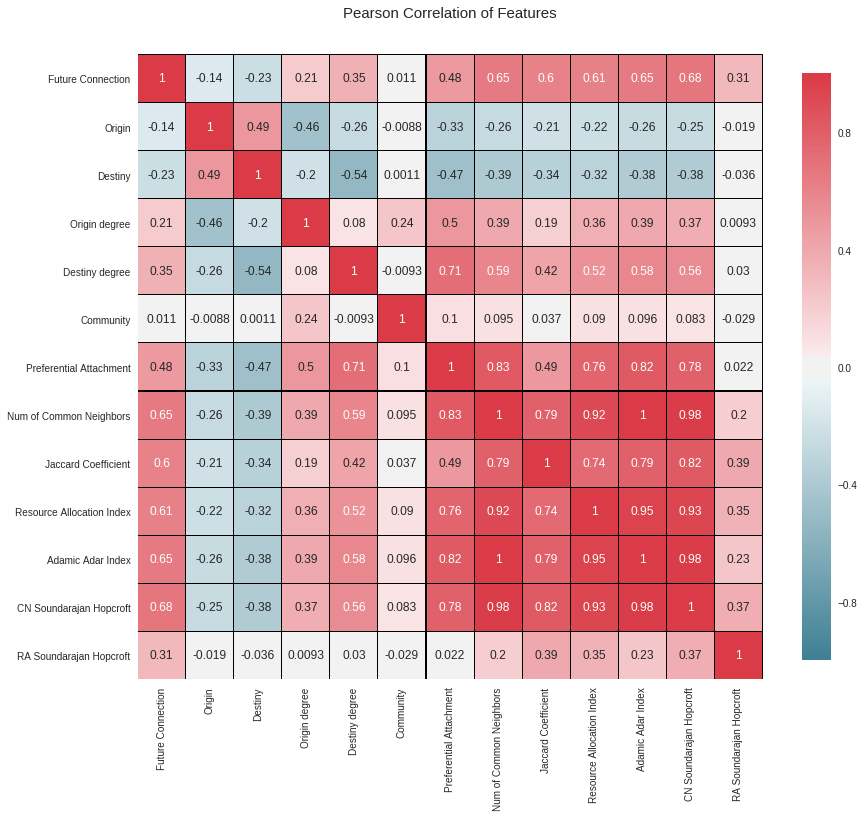

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='black',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    plt.show()

correlation_heatmap(future_connections)

In [65]:
# features = ['Origin degree', 'Destiny degree', 'Community', 'Preferential Attachment',
#             'Num of Common Neighbors', 'Jaccard Coefficient', 'Resource Allocation Index', 'Adamic Adar Index',
#             'CN Soundarajan Hopcroft', 'RA Soundarajan Hopcroft']
# target = ['Future Connection']

In [66]:
# df_train = future_connections[~pd.isnull(future_connections['Future Connection'])]
# df_test = future_connections[pd.isnull(future_connections['Future Connection'])]

In [124]:
# len(future_connections) == len(df_train) + len(df_test)

In [145]:
#

In [69]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
#                             roc_auc_score, roc_curve, confusion_matrix, auc

In [143]:
# x_train, x_test, y_train, y_test = train_test_split(df_train[features], df_train[target], random_state=666)

In [144]:
# x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [125]:
# np.ravel(y_train).shape

# Train Test Split

In [126]:
# clf = RandomForestClassifier(n_estimators=100, max_depth=10).fit(x_train, np.ravel(y_train))

In [127]:
# import matplotlib.pyplot  as plt


# pred = clf.predict(x_test)
# pred_proba = clf.predict_proba(x_test)[:, 1]

# fpr, tpr, threshold = roc_curve(y_test, pred_proba)
# roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

# # print(confusion_matrix(pred, y_test))

In [128]:
# ind = 'accuracy precision recall f1_score roc_auc_score'.split()
# mtrs = [accuracy_score(pred, y_test), precision_score(pred, y_test),
#         recall_score(pred, y_test), f1_score(pred, y_test),
#         roc_auc_score(pred, y_test)]

# rtts = list(zip(ind, mtrs))
# rtts

# MinMaxScaler

In [129]:
# scaler = MinMaxScaler()

# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

In [130]:
# clf = RandomForestClassifier(n_estimators=100, max_depth=10).fit(x_train_scaled, np.ravel(y_train))

In [131]:
# import matplotlib.pyplot  as plt


# pred = clf.predict(x_test)
# pred_proba = clf.predict_proba(x_test_scaled)[:, 1]

# fpr, tpr, threshold = roc_curve(y_test, pred_proba)
# roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

# print(confusion_matrix(pred, y_test))

In [132]:
# ind = 'accuracy precision recall f1_score roc_auc_score'.split()
# mtrs = [accuracy_score(pred, y_test), precision_score(pred, y_test),
#         recall_score(pred, y_test), f1_score(pred, y_test),
#         roc_auc_score(pred, y_test)]

# rmms = list(zip(ind, mtrs))
# rmms

## Running the entire df_train

In [150]:
# 0
# features = ['Origin degree', 'Destiny degree', 'Community', 'Preferential Attachment',
#             'Num of Common Neighbors', 'Jaccard Coefficient', 'Resource Allocation Index', 'Adamic Adar Index',
#             'CN Soundarajan Hopcroft', 'RA Soundarajan Hopcroft']

# 1
features = ['Destiny degree', 'Community', 'Preferential Attachment',
            'Num of Common Neighbors', 'Jaccard Coefficient', 'Resource Allocation Index', 'Adamic Adar Index',
            'CN Soundarajan Hopcroft', 'RA Soundarajan Hopcroft']

target = ['Future Connection']

In [151]:
df_train = future_connections[~pd.isnull(future_connections['Future Connection'])]
df_test = future_connections[pd.isnull(future_connections['Future Connection'])]

In [152]:
x_train = df_train[features]
y_train = df_train[target]

x_test = df_test[features]
# y_test = df_test[target]

# x_train.shape, y_train.shape, x_test.shape, 

In [154]:
# x_train.head()

In [155]:
#

In [156]:
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(df_train[features])
x_test_scaled = scaler.transform(df_test[features])

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10).fit(x_train_scaled, np.ravel(y_train))

In [ ]:
# pred = clf.predict(x_test_scaled)

In [ ]:
pred_proba = clf.predict_proba(x_test_scaled)[:, 1]

In [121]:
# pd.Series(pred_proba, x_test.index)[:10] #return

In [122]:
#

In [ ]:
def new_connections_predictions():
    return pd.Series(pred_proba, x_test.index)

# new_connections_predictions()

(107, 348)    0.020388
(542, 751)    0.052192
(20, 426)     0.593926
(50, 989)     0.006270
(942, 986)    0.007133
(324, 857)    0.009151
(13, 710)     0.099190
(19, 271)     0.153942
(319, 878)    0.008197
(659, 707)    0.007523
(49, 843)     0.006589
(208, 893)    0.006070
(377, 469)    0.008103
(405, 999)    0.008501
(129, 740)    0.054228
(292, 618)    0.059253
(239, 689)    0.008197
(359, 373)    0.010094
(53, 523)     0.421018
(276, 984)    0.048910
(202, 997)    0.049033
(604, 619)    0.030825
(270, 911)    0.048910
(261, 481)    0.054101
(200, 450)    0.987056
(213, 634)    0.009156
(644, 735)    0.030925
(346, 553)    0.009191
(521, 738)    0.009710
(422, 953)    0.008447
                ...   
(672, 848)    0.009055
(28, 127)     0.994434
(202, 661)    0.053113
(54, 195)     0.999997
(295, 864)    0.007251
(814, 936)    0.010331
(839, 874)    0.009410
(139, 843)    0.009126
(461, 544)    0.009637
(68, 487)     0.009782
(622, 932)    0.007826
(504, 936)    0.012155
(479, 528) 